# Calculating Average Class Size by Discipline 2000-2020

Using historical course browser datasets

In [3]:
import os
import pandas as pd
import seaborn as sns

In [4]:
directory = 'C:/Users/abguh/Desktop/wdc/WellesleyCourses'
path = 'C:/Users/abguh/Desktop/wdc'
os.chdir(path)

In [5]:
dlist = []  #list of all dataframes
for filename in os.listdir(directory):
    dlist.append(pd.read_excel(os.path.join(directory, filename)))

In [40]:
humanities = ['AFR', 'AMST', 'ART', 'CLCV', 'EALC', 'ENG', 'ENGR', 'FREN', 'GER', 'HIST', 'ITAS', 'ITAL','MUS', 'PHIL', 'REL', 'SPAN', 'EALL', 'ARAB', 'CHIN', 'HNUR', 'JPN', 'KOR', 'LAT', 'LAST', 'PORT', 'ICPL','SWA', 'SAS', 'SAST''WRIT', 'MES', 'RUSS','RAST', 'THST', 'CAMS', 'CPLT', 'ME/R','GRK', 'HEBR', 'JWST', 'ARTS', 'ARTH', 'ARAB', 'WRIT', 'WGST', 'WOST']
s_sciences =  ['COG', 'ECON', 'SOC', 'ANTH', 'PEAC', 'POL', 'POL1', 'POL2', 'POL3', 'POL4','PSYC', 'CLSC', 'EDUC', 'LING', 'LANG']
n_sciences = ['ASTR', 'BISC', 'CHEM', 'CS', 'ES', 'EXP','GEOS', 'GEOL','MATH', 'NEUR', 'PHYS', 'QR', 'STAT', 'MAS', 'EXTD', 'BIOC']
other = ['PE']

In [41]:
dlist[0]

,CRN,Course,Title,CurrentEnrollment,SeatsAvailable,Location(s),Meeting Time(s),Day(s),Instructor,Additional Instructor(s),Distribution(s),More,label
0,11742,AFR 105 - 01,Intro to Black Experience,12,87 / 99,Green Hall ACAD,11:10 am - 12:20 pm,TF,Anthony Martin,NaN,NaN,More,hum
1,12411,AFR 200 - 01,Africans in Antiquity,6,93 / 99,Founders Hall 317,01:30 pm - 02:40 pm,TF,Anthony Martin,NaN,NaN,More,hum
2,12410,AFR 201 - 01,African-Amer Lit Tradition,7,92 / 99,Clapp Library 1,01:30 pm - 02:40 pm,MTh,Selwyn Cudjoe,NaN,NaN,More,hum
3,12093,AFR 203 - 01,Intro Afro-American Sociology,6,24 / 30,Founders Hall 128,08:30 am - 09:40 am,MTh,Judith Rollins,NaN,NaN,More,hum
4,11741,AFR 207 - 01,Images Africana People-Cinema,48,0 / 45,Founders Hall 120,07:30 pm - 10:00 pm,W,Pashington Obeng,NaN,NaN,More,hum
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,12225,WRIT 125 - 19,What is Plural of Y'all?,16,0 / 15,Founders Hall 227,08:30 am - 09:40 am,TF,Richard Moll,NaN,NaN,More,hum
608,12227,WRIT 125 - 21,Contemporary Writers of NE,10,5 / 15,Slater International Center,09:50 am - 11:00 am,MTh,Jennifer Barber,NaN,NaN,More,hum
609,12273,WRIT 125 - 22,Writing about the Environment,13,2 / 15,Founders Hall 227 Founders Hall 227,01:30 pm - 02:40 pm 02:15 pm - 03:25 pm,F W,Barbara Goldoftas,NaN,NaN,More,hum
610,12274,WRIT 125 - 23,PubHlth-Epidemics&Othr Battles,14,1 / 15,Founders Hall 227 Founders Hall 227,02:50 pm - 04:00 pm 03:35 pm - 04:45 pm,F W,Barbara Goldoftas,NaN,NaN,More,hum


Helper functions: extract course labels and calculate ratio by discipline, given a dataframe

In [47]:
#just extracts the course department code
def course_label(x):
    if x[2] == ' ': label = x[:2]
    else: label = x[:4].strip()
    if 'L0' not in x:
        if label in humanities: return 'hum'
        elif label in s_sciences: return 'ss'
        elif label in n_sciences: return 'ns'
        else: return ''
    else: return ''

#calculates the ratio for one discipline
def calc_ratio(discipline):
    course_df = df[df.label == discipline]
    num_prof = len(course_df['Instructor'])
    num_stu = sum(course_df['CurrentEnrollment'])
    return round(num_stu / num_prof)

#calculates and returns all three discipline's ratios
def calculate_ratios(dataframe):
    df['label'] = df['Course'].apply(course_label)
    h_ratio = calc_ratio('hum')
    s_ratio = calc_ratio('ss')
    n_ratio = calc_ratio('ns')
    return (h_ratio, s_ratio, n_ratio)


In [48]:
#With all the ratios calculated by semester, add them to a list of tuples with format 
#(sem_name, humanities_ratio, sciences_ratio, natural_sciences_ratio)
ratios = []
for i in range(len(dlist)):    #for one semester
    name = os.listdir(directory)[i][:-5]
    df = dlist[i]
    h_ratio, s_ratio, n_ratio = calculate_ratios(df)
    ratios.append((name, h_ratio, s_ratio, n_ratio))
    
df = pd.DataFrame(ratios, columns = ['semester', 'humanities', 'social sciences', 'natural sciences'])
df

,semester,humanities,social sciences,natural sciences
0,2000-09,17,20,21
1,2001-02,17,19,18
2,2001-09,16,21,20
3,2002-02,16,20,18
4,2002-09,16,21,20
5,2003-02,15,19,18
6,2003-09,16,20,20
7,2004-02,15,18,17
8,2004-09,15,21,19
9,2005-02,15,18,16


In [49]:
df = pd.melt(df, id_vars = 'semester', value_vars = ['humanities', 'social sciences', 'natural sciences'], var_name = 'discipline', value_name = 'ratio (:1)')
df

,semester,discipline,ratio (:1)
0,2000-09,humanities,17
1,2001-02,humanities,17
2,2001-09,humanities,16
3,2002-02,humanities,16
4,2002-09,humanities,16
...,...,...,...
121,2019-02,natural sciences,19
122,2019-09,natural sciences,20
123,2020-02,natural sciences,19
124,2020-09,natural sciences,20


In [50]:
labels = ['2000','', '', '', '', '', '', '', '', '', '2005','', '', '', '', '', '', '', '', '', '2010','', '', '', '', '', '', '', '', '', '2015','', '', '', '', '', '', '', '', '', '2020']

Text(0.5, 1.0, 'Average Class Size Over Time')

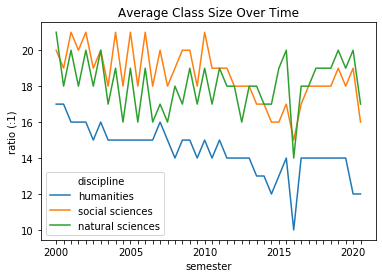

In [51]:
plt = sns.lineplot(x="semester", y="ratio (:1)", hue="discipline", data=df)
plt.set_xticklabels(labels)
plt.set_title('Average Class Size Over Time')


In [52]:
plt = plt.figure.savefig('class_sizes.png', 
           transparent=True)